In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind

In [67]:
#Генеририруем случайные данные для групп из нормального распределения с заданным средним и стандартным отклонением
np.random.seed(1)
mu_a = 500 # Среднее для группы А
sigma_a = 12  # Стандартное отклонение для группы А
mu_b = 501 # Среднее для группы B
sigma_b = 11  # Стандартное отклонение для группы B
mu_c = 510 # Среднее для группы C
sigma_c = 20  # Стандартное отклонение для группы C
group_a = np.random.normal(loc = mu_a, scale = sigma_a, size = 1000) #Группа A
group_b = np.random.normal(loc = mu_b, scale = sigma_b, size = 1000) #Группа B
group_c = np.random.normal(loc = mu_c, scale = sigma_c, size = 1000) #Группа C

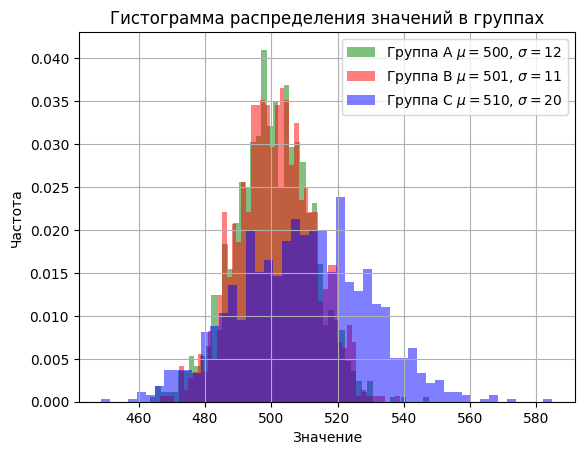

In [68]:
# Строим графики
label_a = 'Группа А ' fr'$\mu={mu_a:.0f}$, $\sigma={sigma_a:.0f}$'
label_b = 'Группа B ' fr'$\mu={mu_b:.0f}$, $\sigma={sigma_b:.0f}$'
label_c = 'Группа C ' fr'$\mu={mu_c:.0f}$, $\sigma={sigma_c:.0f}$'

n, bins, patches = plt.hist(group_a, 50, density = True, facecolor = 'g', alpha = 0.5, label = label_a)
n, bins, patches = plt.hist(group_b, 50, density = True, facecolor = 'r', alpha = 0.5, label = label_b)
n, bins, patches = plt.hist(group_c, 50, density = True, facecolor = 'b', alpha = 0.5, label = label_c)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений в группах')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Функция для вывода стаитистической значимости
def result (p_value, alpha):
    negative = 'Статистически значимых различий между группами не найдено'
    positive = 'Обнаружены статистически значимые различия между группами'
    if p_value > alpha:
        return negative
    else:
        return positive

In [69]:
alpha = 0.05 # Заданный уровень значимости


In [70]:
# Функция для для t-теста и вывода стаитистической значимости
def result (group_1, group_2):
    _, p_value = ttest_ind(group_1, group_2)
    negative = f' P-значение = {p_value}. Статистически значимых различий между группами не найдено'
    positive = f' P-значение = {p_value}. Обнаружены статистически значимые различия между группами'
    if p_value > alpha:
        return negative
    else:
        return positive

In [71]:
print(f'Для групп А и В {result(group_a, group_b)}')
print(f'Для групп А и C {result(group_a, group_c)}')
print(f'Для групп B и C {result(group_b, group_c)}')

Для групп А и В  P-значение = 0.1064800571247695. Статистически значимых различий между группами не найдено
Для групп А и C  P-значение = 2.5320414390409707e-35. Обнаружены статистически значимые различия между группами
Для групп B и C  P-значение = 3.699302726640853e-30. Обнаружены статистически значимые различия между группами


Выводы:

- Результат t-теста для групп А и B - показывает что в системе все хорошо.
- А вот результаты с группой С - указывают на технические проблемы в системе. 
Надо бы разобраться с ними прежде, чем проводить А/Б тестирование